<img src="https://raw.githubusercontent.com/AdrianoPereira/CAP421/main/lectures/homework10/images/cover-label-smoothing.png" style="width: 100%;">

### OVERVIEW
<hr />

This notebook contains exercise 10 (optional exercise 01) which deals with label smoothing, a kind of regularization of neural networks. This exercise was proposed by Professor Valdivino Santiago Júnior in the course CAP421 - Deep Learning offered in the Postgraduate Program in Applied Computing at the National Institute for Space Research.

#### TABLE OF CONTENT
<hr />


**Author:** Adriano P. Almeida <<adriano.almeida@inpe.br>>
<br>
**Created on:** 09 November, 2021
<br /><br />

<a href="#">
    <img style="float: left; margin-right: 10px;" src="https://colab.research.google.com/assets/colab-badge.svg" />
</a>

<a href="https://github.com/AdrianoPereira/CAP421/tree/main/lectures/homework10">
    <img style="float: left; margin-right: 10px;" src="https://img.shields.io/badge/GitHub-Open%20Repository-lightgrey?logo=github" />
</a>

**Table of content** <span id="table_of_content"></span>
* [1. Information theory](#information_theory)
    * [1.1. Entropy](#entropy)
    * [1.2. Cross-entropy](#cross_entropy)
* [2. Label smoothing](#label_smoothing)
    * [2.1. Neural network using label smoothing](#neural_network)
        * [2.1.1. Modelo com label smoothing $\epsilon=0.00$](#model01)
        * [2.1.2. Modelo com label smoothing $\epsilon=0.25$](#model02)
        * [2.1.3. Modelo com label smoothing $\epsilon=0.50$](#model03)
        * [2.1.4. Modelo com label smoothing $\epsilon=0.75$](#model04)
        * [2.1.5. Modelo com label smoothing $\epsilon=1.00$](#model05)
    * [2.2. Evaluating models](#evaluating_models)
* [3. Final Considerations](#final_considerations)
* [4. References](#references)

## 1. Information theory <a id="information_theory" href="#table_of_content">^</a>
<hr />

Information theory is a study field introduced by [Shannon (1948)](#shannon_mathematical_1948), which seeks to study the quantification, storage and transmission of information. The quantification of information seeks to understand how surprising a given event is, and the more unexpected the event, the more information it has. Events with low probability are surprising events, so with more information. Events with high probability are not surprising and have less information [(GOODFELLOW, 2016)](#goodfellow_deep_2016). The amount of information of an event $H(x)$ is given by Equation [1](#eq01), in which the amount of information is given by the $-log$ in base 2 of the probability ($p$) of the event $x$.

<p id="eq01">
$$
H(x) = -log_{2}(p(x))
$$
<span style="display: block; text-align: center; margin-top: 10px;"><strong>Equation 1</strong>: Shannon's information.</span>
</p>

The following code snippet shows an example of this inversely proportional relationship between the amount of information in the event and its probability.

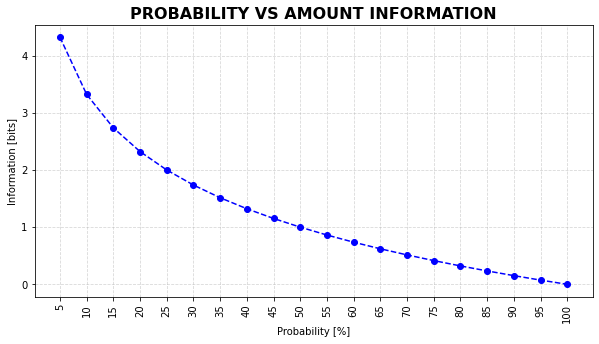

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Creating vectorize function to calculate information given one list of probability
H = np.vectorize(lambda x: -np.log2(x))

# Range of probability between 0.05 and 1.0
p = np.arange(0.05, 1.05, 0.05)

# Applying functions to each probability value
information = H(p)

# Plotting probability vs amount informations
plt.figure(figsize=(10, 5))
plt.title("PROBABILITY VS AMOUNT INFORMATION", fontdict={'size': 16, 'weight': 'bold'})
plt.plot(p, information, 'bo--')
plt.xlabel("Probability [%]")
plt.ylabel("Information [bits]")
plt.xticks(p, (p*100).astype(int), rotation=90)
plt.grid(ls='--', alpha=0.5)
plt.show()

### 1.1. Entropy <a id="entropy" href="#table_of_content">^</a>
<hr />

In information theory, entropy is one of the main metrics to measure the amount of information in random variables. This metric calculates the degree of uncertainty from the amount of information present in the data from the sum of all instances [(Goodfellow, 2016)](#goodfellow_deep_2016). Given a set of the probability of occurrence of random variables, it is possible to calculate their entropy. Its development can be extrapolated to a probability curve that, if asymmetric (skewed probability distribution), indicates low entropy, therefore, an unsurprising event. On the other hand, if the curve is symmetrical, it may indicate high entropy, which is a surprising event [(Goodfellow, 2016)](#goodfellow_deep_2016). Entropy can be described by Equation [2](#eq02).

<p id="eq02">
$$
    H(X) = -\sum_{i=1}^{n}P(x_{i})log_{2}P(x_{i})
$$
<span style="display: block; text-align: center; margin-top: 10px;"><strong>Equation 2</strong>: Shannon's entropy.</span>
</p>

The following code snippet shows an example with the application of entropy to a set of probabilities.

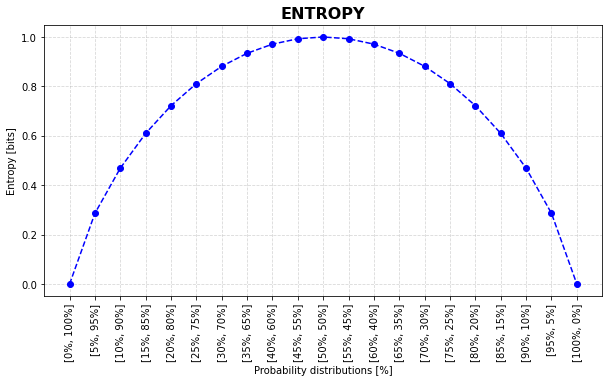

In [4]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Defining a factor to avoid infinity values: 0.000000001
EPS = 1e-9

# Creating vectorize function to calculate information given one list of probability
H = lambda D: -np.sum([d*np.log2(d+EPS) for d in D])

# Creating range of probability between 0.0 and 1.0
P = np.arange(0.0, 1.05, 0.05)
# P = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# Creating events probability distribution
dists = [[p, 1.0 - p] for p in P]

# Applying functions to calculate entropy for each event
entropy = [H(D) for D in dists]

# Plotting probability vs amount informations
plt.figure(figsize=(10, 5))
plt.title("ENTROPY", fontdict={'size': 16, 'weight': 'bold'})
plt.plot(entropy, 'bo--')
plt.xlabel("Probability distributions [%]")
plt.ylabel("Entropy [bits]")
labels = [f"[{x[0]*100:.0f}%, {x[1]*100:.0f}%]" for x in dists]
plt.xticks(np.arange(len(entropy)), labels, rotation=90)
plt.grid(ls='--', alpha=0.5)
plt.show()

## 1.2. Cross-entropy <a id="cross_entropy" href="#table_of_content">^</a>
<hr />

While information seeks to quantify the uncertainty of an event and entropy seeks to quantify the amount of information in a variable, cross-entropy seeks to quantify the entropy between two or more probability distributions. Thus, given two probability distributions $P(x)$ and $Q(x)$ the cross-entropy will look for a relationship between the entropy of the two probability distributions. The cross-entropy is described by Equation [3](#eq03).

<p id="eq03">
$$
    H(p,q) = -\sum_{x}P(x)log_{2}Q(x)
$$
<span style="display: block; text-align: center; margin-top: 10px;"><strong>Equation 3</strong>: Cross-entropy in the context of information theory.</span>
</p>

Cross-entropy can also be used as a loss function in machine learning models in classification tasks. Then, given the real probability distribution $y$ it is cross-entropy calculated with the probability distribution estimated by the model $ŷ$, which will show how close to the real value the model is approaching. The cross-entropy as loss function is described by Equation [4](#eq04).

<p id="eq04">
$$
    H(y,ŷ) = -\sum_{i=1}^{n}y_{i}log_{2}(ŷ_i)
$$
<span style="display: block; text-align: center; margin-top: 10px;"><strong>Equation 4</strong>: Cross-entropy as loss function.</span>
</p>

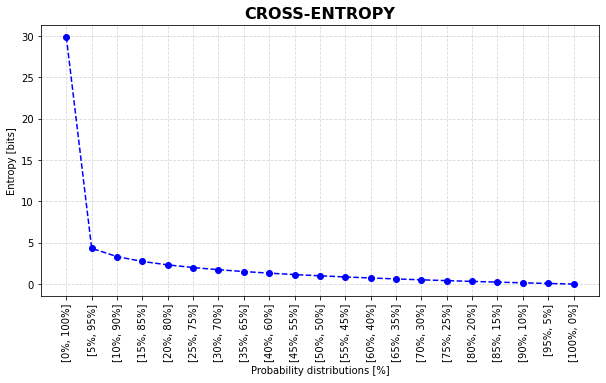

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Defining a factor to avoid infinity values: 0.000000001
EPS = 1e-9

# Creating vectorize function to calculate information given one list of probability
H = lambda Y, YH: -np.sum([y*np.log2(yh+EPS) for y, yh in zip(Y, YH)])

# Defining target of classes
target = [1.0, 0.0]

# Creating range of probability between [0.0, 1.0] and [1.0, 0.0]
P = [[p, 1.0-p] for p in np.arange(0.0, 1.05, 0.05)]

P
# "%.3f" % H(target, [.80, .2])
# # Applying functions to calculate cross-entropy for each distribution
cross_entropy = [H(target, D) for D in P]

# # Plotting cross-entropy
plt.figure(figsize=(10, 5))
plt.title("CROSS-ENTROPY", fontdict={'size': 16, 'weight': 'bold'})
plt.plot(cross_entropy, 'bo--')
plt.xlabel("Probability distributions [%]")
plt.ylabel("Entropy [bits]")
labels = [f"[{x[0]*100:.0f}%, {x[1]*100:.0f}%]" for x in dists]
plt.xticks(np.arange(len(cross_entropy)), labels, rotation=90)
plt.grid(ls='--', alpha=0.5)
plt.show()

## 2. Label smoothing <a id="label_smoothing" href="#table_of_content">^</a>
<hr />

In machine learning, classification models seek to generalize characteristics associated with a given class and, accordingly, assign it some label. These labels must be encoded to an instruction that can be understood by the model, this encoding can be mainly in two types: hard label and soft label [(Galstyan, 2007)](#galstyan_empirical_2007). Hard label is the characterization of the label through a single value, which represents a class identifier. The soft label is a probability/likelihood value associated with each of the classes associated with the problem.

Consider the following hypothetical example:
> Given a time series of some meteorological variables at time $t$, the model should predict whether at time $t+$ it will rain or not. The input variables are the average every 10 minutes (over an hour) of the temperature, humidity and atmospheric pressure, and as an output a label indicating whether it will rain or not.

In this problem, when applying labeling from the hard label, an identifier for each of the classes could be associated, for example 0: it will not rain and 1: it will rain. For labeling from the soft label, a probability can be assigned to each event. A priori, the training data is labeled with each of the classes, so what you have is the certainty that that event happened with 100% certainty, so it can be labeled in [1, 0]: it will not rain and [0, 1]: it will rain. Note that 0 (0%) is the probability that event will not happen, while 1 (100%) is the probability that event will certainly happen. By assigning a probability, the model can perform better, as it will consider the uncertainties of the event being modelled. Already using only one label, the model may suffer from over-confidence, which could harm its performance in the generalization process. Label smoothing is a regularization that seeks to reduce the problem of over-confidence in classification models. This regularization was used to optimize the Inception convolutional neural network architecture [(Szegedy, 2016)](#szegedy_rethinking_2016).

The soft label is used in neural networks trained for classification using label smoothing as regularization. So, in a problem involving $K$ classes, each class $k \in {1...K}$ in the real dataset is assigned a probability value, and 1 is assigned (Equation [5]( #eq05)) for ground truth class and 0 for other classes. For the model, the probabilities are assigned by Equation [6](#eq06), using the cross-entropy as loss function. The neural network weights can be updated using the descending gradient (Equation [7](#eq07)), the error variation calculated by the cross-entropy ($\partial l$) in relation to the probability assigned by the model ($\partial z_{i}$).

<p id="eq05">
$$
\sum_{k} q(k|x) = 1
$$
<span style="display: block; text-align: center; margin-top: 10px;"><strong>Equation 5</strong>: Ground truth class.</span>
</p>

<p id="eq06">
$$
p(k|x) = \frac{exp(z_{k})}{\sum_{i=1}^{K}exp(z_{i})}
$$
<span style="display: block; text-align: center; margin-top: 10px;"><strong>Equation 6</strong>: Model classification.</span>
</p>

<p id="eq07">
$$
\frac{\partial l}{\partial z_{k}} = p(k)-q(k)
$$
<span style="display: block; text-align: center; margin-top: 10px;"><strong>Equation 7</strong>: Gradient descent for updating weights.</span>
</p>

Effectively, label smoothing-based regularization is done from a factor ($\epsilon$) assigned to the model. This factor will penalize the probability predictions that sharper that deviate from the actual values. Then, the cross-entropy used as a cost function can be reformulated as described in Equation [8](#eq08). Figure [1](#fig01) shows some examples of models based on the Inception-v4 architecture with different values for the factor $\epsilon$ in the ImageNet database.

<p id="eq07">
$$
H(y,ŷ) = -\sum_{k=1}^{K}y_{i}log_{2}(ŷ_i) = (1-\epsilon)H(q, p)+\epsilon H(u, p)
$$
<span style="display: block; text-align: center; margin-top: 10px;"><strong>Equation 7</strong>: Label smoothing applying in cross-entropy loss funtion.</span>
</p>

<p id="fig01">
    <img src="https://raw.githubusercontent.com/AdrianoPereira/CAP421/main/lectures/homework10/images/inceptionv4LS.png" />
    <span style="display: block; text-align: center; margin-top: 10px;"><strong>Figure 1</strong>: Label smoothing with different factors applied in Inception-v4. Source: <a href="#muller_when_2019">MÜLLER (2019)</a>.</span>
         
</p>

### 2.1 Neural network using label smoothing <a id="neural_network" href="#table_of_content">^</a>
<hr />

In this sub-section, some models will be tested using the dataset [MNIST](http://yann.lecun.com/exdb/mnist), which is handwritten numbers (Figure [2](#fig02) ). The neural network used will be the CNN with LeNet 5 architecture [LeCun, 2015](#lecun_lenet5_2015) configured with the same hyper-parameters, with the exception of the smoothing label regularization factor, which will vary between the values 0.00, 0.25, 0.50, 0.75, and 1.00. For the creation and training of the model, the platform [TensorFlow](https://www.tensorflow.org) will be used. TensowFlow has the implementation of the cross-entropy function for multiple classes with support for smoothing label smoothing. The code highlighted in Figure [3](#fig03) shows an snippet of the implementation of cross-entropy and label smoothing in TensorFlow.

<p id="fig02">
    <img src="https://raw.githubusercontent.com/AdrianoPereira/CAP421/main/lectures/homework10/images/mnist_dataset.png" />
    <span style="display: block; text-align: center; margin-top: 10px;"><strong>Figure 2</strong>: Sample from the MNIST dataset. Source: <a href="https://en.wikipedia.org/wiki/MNIST_database">https://en.wikipedia.org/wiki/MNIST_database</a>.</span>
         
</p>

<p id="fig03">
    <img width="70%" src="https://raw.githubusercontent.com/AdrianoPereira/CAP421/main/lectures/homework10/images/cross-entropy.png" />
    <span style="display: block; text-align: center; margin-top: 10px;"><strong>Figure 3</strong>: Cross-entropy implementation with label smoothing in TensorFlow.</span>
         
</p>

LeNet 5 is a convolutional neural network architecture used for image classification. Initially, it was conceived to classify handwritten characters, being one of the pioneering architectures in deep learning. LeNet 5 is made up of some convolution blocks, made up of feature extracting filters and sub-sampling layers. At the end of the network, the extracted feature maps are transformed into a one-dimensional vector that will serve as input to a fully connected neural network. Figure [4](#fig04) shows a LeNet scheme.

<p id="fig04">
    <img src="https://raw.githubusercontent.com/AdrianoPereira/CAP421/main/lectures/homework10/images/lenet5.png" />
    <span style="display: block; text-align: center; margin-top: 10px;"><strong>Figure 4</strong>: LeNet architecture scheme. Source: <a href="lecun_backpropagation_1998">LeCun (1998)</a></span>
         
</p>

The following code snippet makes the import of the libraries that will be used in the experiments, the loading and normalization of the dataset that will be used.

In [2]:
# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import metrics as smetrics
import scipy
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pickle
import warnings
warnings.filterwarnings('ignore')


# Creating directories structure
PATH="/home/adriano/CAP421/lectures/homework10"
res_path = os.path.join(PATH, 'results')
out_model = os.path.join(res_path, 'models')
if not os.path.exists(res_path): 
    os.makedirs(res_path)
if not os.path.exists(out_model): 
    os.makedirs(out_model)


# Load and cast to float MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


# Normalizing dataset between -1 and 1 so it can be used correctly in the 
# hyperbolic tangent activation function
scaler_x = MinMaxScaler(feature_range=(-1, 1))

X = np.array([*X_train, *X_test])
X = X.reshape((X.shape[0], X.shape[1]*X.shape[2]))
X = scaler_x.fit_transform(X)
X = X.reshape((X.shape[0], X_train.shape[1], X_train.shape[2]))

X_train_fmt = X[:X_train.shape[0]]
X_test_fmt = X[X_train.shape[0]:]


# Turning output from hard label to soft label
y_train_fmt = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_fmt = tf.keras.utils.to_categorical(y_test, num_classes=10)

#### 2.1.2. Model with label smoothing $\epsilon=0.00$ <a id="model01" href="#table_of_content">^</a>
<hr />

The following code snippet defines the basis of the network architecture.

In [104]:
input_layer = tf.keras.Input((*X_train_fmt.shape[1:], 1))

c1 = tf.keras.layers.Conv2D(
    filters=6, kernel_size=5, strides=1, activation='tanh', padding='same'
)(input_layer)

s2 = tf.keras.layers.AveragePooling2D()(c1)

c3 = tf.keras.layers.Conv2D(
    filters=16, kernel_size=5, strides=1, activation='tanh', padding='valid'
)(s2)

s4 = tf.keras.layers.AveragePooling2D()(c3)

flatten = tf.keras.layers.Flatten()(s4)

c5 = tf.keras.layers.Dense(120, activation='tanh')(flatten)

f6 = tf.keras.layers.Dense(84, activation='tanh')(c5)

output_layer = tf.keras.layers.Dense(y_train_fmt.shape[1], activation='softmax')(f6)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name='LeNet5')
model.summary()

Model: "LeNet5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_6 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 120)               48120

The following code snippet compiles the model with the label smoothing factor = 0 (no label smoothing).

In [109]:
label_smoothing_factor = 0.0
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
loss = tf.keras.losses.CategoricalCrossentropy(
    label_smoothing=label_smoothing_factor
)
metric = ['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

The following code snippet intialize the model training, with a callback function to stop execution when the model stops converging.

In [110]:
batch_size = 64
callbacks = (
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy', patience=10, restore_best_weights=True
    ),
    tf.keras.callbacks.ModelCheckpoint(
        f"{out_model}/lenet5-ls{label_smoothing_factor}-{{epoch:02d}}-{{val_accuracy:.2f}}.hdf5", 
        monitor='val_acc', verbose=1, save_best_only=True, mode='max'
    )
)
history = model.fit(
    X_train_fmt, y_train_fmt, epochs=100, batch_size=batch_size,
    validation_split=0.15,  callbacks=callbacks, verbose=1
)

Epoch 1/100
797/797 [==============================] - 12s 15ms/step - loss: 0.4545 - accuracy: 0.8794 - val_loss: 0.3864 - val_accuracy: 0.8999
Epoch 2/100
797/797 [==============================] - 15s 18ms/step - loss: 0.4364 - accuracy: 0.8799 - val_loss: 0.3678 - val_accuracy: 0.9036
Epoch 3/100
797/797 [==============================] - 11s 14ms/step - loss: 0.4073 - accuracy: 0.8903 - val_loss: 0.3526 - val_accuracy: 0.9064
Epoch 4/100
797/797 [==============================] - 15s 18ms/step - loss: 0.3989 - accuracy: 0.8902 - val_loss: 0.3399 - val_accuracy: 0.9093
Epoch 5/100
797/797 [==============================] - 13s 16ms/step - loss: 0.3815 - accuracy: 0.8941 - val_loss: 0.3285 - val_accuracy: 0.9122
Epoch 6/100
797/797 [==============================] - 12s 15ms/step - loss: 0.3676 - accuracy: 0.8976 - val_loss: 0.3183 - val_accuracy: 0.9147
Epoch 7/100
797/797 [==============================] - 10s 13ms/step - loss: 0.3611 - accuracy: 0.8986 - val_loss: 0.3092 - val_ac

Epoch 38/100
797/797 [==============================] - 12s 15ms/step - loss: 0.2088 - accuracy: 0.9393 - val_loss: 0.1789 - val_accuracy: 0.9502
Epoch 39/100
797/797 [==============================] - 14s 17ms/step - loss: 0.2015 - accuracy: 0.9408 - val_loss: 0.1763 - val_accuracy: 0.9511
Epoch 40/100
797/797 [==============================] - 12s 15ms/step - loss: 0.2046 - accuracy: 0.9400 - val_loss: 0.1740 - val_accuracy: 0.9512
Epoch 41/100
797/797 [==============================] - 13s 16ms/step - loss: 0.1946 - accuracy: 0.9437 - val_loss: 0.1718 - val_accuracy: 0.9523
Epoch 42/100
797/797 [==============================] - 12s 15ms/step - loss: 0.1940 - accuracy: 0.9429 - val_loss: 0.1696 - val_accuracy: 0.9524
Epoch 43/100
797/797 [==============================] - 12s 15ms/step - loss: 0.1931 - accuracy: 0.9430 - val_loss: 0.1673 - val_accuracy: 0.9534
Epoch 44/100
797/797 [==============================] - 11s 13ms/step - loss: 0.1893 - accuracy: 0.9450 - val_loss: 0.1656 -

In [112]:
# Saving model and logs of training/validadtion
model.save(f"{PATH}/results/models/lenet5-ls0.00.h5")
with open(f"{PATH}/results/models/history-lenet5-ls0.00.pkl", 'wb') as handle:
    pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

#### 2.1.2. Model with label smoothing $\epsilon=0.25$ <a id="model02" href="#table_of_content">^</a>
<hr />

The following code snippet defines the basis of the network architecture.

In [113]:
input_layer = tf.keras.Input((*X_train_fmt.shape[1:], 1))

c1 = tf.keras.layers.Conv2D(
    filters=6, kernel_size=5, strides=1, activation='tanh', padding='same'
)(input_layer)

s2 = tf.keras.layers.AveragePooling2D()(c1)

c3 = tf.keras.layers.Conv2D(
    filters=16, kernel_size=5, strides=1, activation='tanh', padding='valid'
)(s2)

s4 = tf.keras.layers.AveragePooling2D()(c3)

flatten = tf.keras.layers.Flatten()(s4)

c5 = tf.keras.layers.Dense(120, activation='tanh')(flatten)

f6 = tf.keras.layers.Dense(84, activation='tanh')(c5)

output_layer = tf.keras.layers.Dense(y_train_fmt.shape[1], activation='softmax')(f6)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name='LeNet5')
model.summary()

Model: "LeNet5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_8 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_9 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 120)               48120

The following code snippet compiles the model with the label smoothing factor = 0.25.

In [115]:
label_smoothing_factor = 0.25
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
loss = tf.keras.losses.CategoricalCrossentropy(
    label_smoothing=label_smoothing_factor
)
metrics = ['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

The following code snippet intialize the model training, with a callback function to stop execution when the model stops converging.

In [117]:
batch_size = 64
callbacks = (
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy', patience=10, restore_best_weights=True
    ),
    tf.keras.callbacks.ModelCheckpoint(
        f"{out_model}/lenet5-ls{label_smoothing_factor}-{{epoch:02d}}-{{val_accuracy:.2f}}.hdf5", 
        monitor='val_acc', verbose=1, save_best_only=True, mode='max'
    )
)
history = model.fit(
    X_train_fmt, y_train_fmt, epochs=100, batch_size=batch_size,
    validation_split=0.15,  callbacks=callbacks, verbose=1
)

Epoch 1/100
797/797 [==============================] - 12s 15ms/step - loss: 1.8722 - accuracy: 0.6255 - val_loss: 1.6999 - val_accuracy: 0.7466
Epoch 2/100
797/797 [==============================] - 12s 16ms/step - loss: 1.6159 - accuracy: 0.7570 - val_loss: 1.5102 - val_accuracy: 0.8191
Epoch 3/100
797/797 [==============================] - 12s 15ms/step - loss: 1.4907 - accuracy: 0.8086 - val_loss: 1.4262 - val_accuracy: 0.8479
Epoch 4/100
797/797 [==============================] - 12s 15ms/step - loss: 1.4326 - accuracy: 0.8308 - val_loss: 1.3848 - val_accuracy: 0.8631
Epoch 5/100
797/797 [==============================] - 12s 15ms/step - loss: 1.4010 - accuracy: 0.8451 - val_loss: 1.3604 - val_accuracy: 0.8727
Epoch 6/100
797/797 [==============================] - 13s 17ms/step - loss: 1.3806 - accuracy: 0.8559 - val_loss: 1.3441 - val_accuracy: 0.8787
Epoch 7/100
797/797 [==============================] - 11s 14ms/step - loss: 1.3658 - accuracy: 0.8626 - val_loss: 1.3317 - val_ac

Epoch 38/100
797/797 [==============================] - 14s 18ms/step - loss: 1.2223 - accuracy: 0.9274 - val_loss: 1.2034 - val_accuracy: 0.9408
Epoch 39/100
797/797 [==============================] - 12s 16ms/step - loss: 1.2197 - accuracy: 0.9284 - val_loss: 1.2010 - val_accuracy: 0.9420
Epoch 40/100
797/797 [==============================] - 14s 17ms/step - loss: 1.2171 - accuracy: 0.9296 - val_loss: 1.1988 - val_accuracy: 0.9426
Epoch 41/100
797/797 [==============================] - 12s 15ms/step - loss: 1.2147 - accuracy: 0.9305 - val_loss: 1.1966 - val_accuracy: 0.9432
Epoch 42/100
797/797 [==============================] - 13s 16ms/step - loss: 1.2123 - accuracy: 0.9311 - val_loss: 1.1945 - val_accuracy: 0.9434
Epoch 43/100
797/797 [==============================] - 14s 17ms/step - loss: 1.2099 - accuracy: 0.9324 - val_loss: 1.1925 - val_accuracy: 0.9447
Epoch 44/100
797/797 [==============================] - 13s 16ms/step - loss: 1.2077 - accuracy: 0.9333 - val_loss: 1.1905 -

In [118]:
# Saving model and logs
model.save(f"{PATH}/results/models/lenet5-ls0.25.h5")
with open(f"{PATH}/results/models/history-lenet5-ls0.25.pkl", 'wb') as handle:
    pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

#### 2.1.3. Model with label smoothing $\epsilon=0.50$ <a id="model03" href="#table_of_content">^</a>
<hr />

The following code snippet defines the basis of the network architecture.

In [123]:
input_layer = tf.keras.Input((*X_train_fmt.shape[1:], 1))

c1 = tf.keras.layers.Conv2D(
    filters=6, kernel_size=5, strides=1, activation='tanh', padding='same'
)(input_layer)

s2 = tf.keras.layers.AveragePooling2D()(c1)

c3 = tf.keras.layers.Conv2D(
    filters=16, kernel_size=5, strides=1, activation='tanh', padding='valid'
)(s2)

s4 = tf.keras.layers.AveragePooling2D()(c3)

flatten = tf.keras.layers.Flatten()(s4)

c5 = tf.keras.layers.Dense(120, activation='tanh')(flatten)

f6 = tf.keras.layers.Dense(84, activation='tanh')(c5)

output_layer = tf.keras.layers.Dense(y_train_fmt.shape[1], activation='softmax')(f6)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name='LeNet5')
model.summary()

Model: "LeNet5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_12 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_13 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 120)               48120

The following code snippet compiles the model with the label smoothing factor = 0.50.

In [124]:
label_smoothing_factor = 0.50
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
loss = tf.keras.losses.CategoricalCrossentropy(
    label_smoothing=label_smoothing_factor
)
metrics = ['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

The following code snippet intialize the model training, with a callback function to stop execution when the model stops converging.

In [125]:
batch_size = 64
callbacks = (
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy', patience=10, restore_best_weights=True
    ),
    tf.keras.callbacks.ModelCheckpoint(
        f"{out_model}/lenet5-ls{label_smoothing_factor}-{{epoch:02d}}-{{val_accuracy:.2f}}.hdf5", 
        monitor='val_acc', verbose=1, save_best_only=True, mode='max'
    )
)
history = model.fit(
    X_train_fmt, y_train_fmt, epochs=100, batch_size=batch_size,
    validation_split=0.15,  callbacks=callbacks, verbose=1
)

Epoch 1/100
797/797 [==============================] - 13s 16ms/step - loss: 2.2804 - accuracy: 0.2269 - val_loss: 2.1499 - val_accuracy: 0.5859
Epoch 2/100
797/797 [==============================] - 12s 15ms/step - loss: 2.1237 - accuracy: 0.6142 - val_loss: 2.0327 - val_accuracy: 0.7357
Epoch 3/100
797/797 [==============================] - 14s 18ms/step - loss: 2.0231 - accuracy: 0.7214 - val_loss: 1.9647 - val_accuracy: 0.7883
Epoch 4/100
797/797 [==============================] - 10s 13ms/step - loss: 1.9680 - accuracy: 0.7653 - val_loss: 1.9278 - val_accuracy: 0.8192
Epoch 5/100
797/797 [==============================] - 12s 15ms/step - loss: 1.9368 - accuracy: 0.7964 - val_loss: 1.9065 - val_accuracy: 0.8381
Epoch 6/100
797/797 [==============================] - 12s 16ms/step - loss: 1.9191 - accuracy: 0.8147 - val_loss: 1.8927 - val_accuracy: 0.8523
Epoch 7/100
797/797 [==============================] - 12s 15ms/step - loss: 1.9058 - accuracy: 0.8287 - val_loss: 1.8827 - val_ac

Epoch 38/100
797/797 [==============================] - 12s 15ms/step - loss: 1.8155 - accuracy: 0.9083 - val_loss: 1.8012 - val_accuracy: 0.9276
Epoch 39/100
797/797 [==============================] - 11s 14ms/step - loss: 1.8143 - accuracy: 0.9086 - val_loss: 1.7997 - val_accuracy: 0.9279
Epoch 40/100
797/797 [==============================] - 13s 16ms/step - loss: 1.8117 - accuracy: 0.9104 - val_loss: 1.7984 - val_accuracy: 0.9293
Epoch 41/100
797/797 [==============================] - 10s 13ms/step - loss: 1.8104 - accuracy: 0.9111 - val_loss: 1.7969 - val_accuracy: 0.9306
Epoch 42/100
797/797 [==============================] - 13s 16ms/step - loss: 1.8094 - accuracy: 0.9123 - val_loss: 1.7956 - val_accuracy: 0.9301
Epoch 43/100
797/797 [==============================] - 11s 14ms/step - loss: 1.8078 - accuracy: 0.9150 - val_loss: 1.7942 - val_accuracy: 0.9327
Epoch 44/100
797/797 [==============================] - 11s 14ms/step - loss: 1.8049 - accuracy: 0.9170 - val_loss: 1.7930 -

In [126]:
# Saving model and logs
model.save(f"{PATH}/results/models/lenet5-ls0.50.h5")
with open(f"{PATH}/results/models/history-lenet5-ls0.50.pkl", 'wb') as handle:
    pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

#### 2.1.4. Model with label smoothing $\epsilon=0.75$ <a id="model04" href="#table_of_content">^</a>
<hr />

The following code snippet defines the basis of the network architecture.

In [127]:
input_layer = tf.keras.Input((*X_train_fmt.shape[1:], 1))

c1 = tf.keras.layers.Conv2D(
    filters=6, kernel_size=5, strides=1, activation='tanh', padding='same'
)(input_layer)

s2 = tf.keras.layers.AveragePooling2D()(c1)

c3 = tf.keras.layers.Conv2D(
    filters=16, kernel_size=5, strides=1, activation='tanh', padding='valid'
)(s2)

s4 = tf.keras.layers.AveragePooling2D()(c3)

flatten = tf.keras.layers.Flatten()(s4)

c5 = tf.keras.layers.Dense(120, activation='tanh')(flatten)

f6 = tf.keras.layers.Dense(84, activation='tanh')(c5)

output_layer = tf.keras.layers.Dense(y_train_fmt.shape[1], activation='softmax')(f6)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name='LeNet5')
model.summary()

Model: "LeNet5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_14 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_15 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 120)               48120

The following code snippet compiles the model with the label smoothing factor = 0.75.

In [128]:
label_smoothing_factor = 0.75
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
loss = tf.keras.losses.CategoricalCrossentropy(
    label_smoothing=label_smoothing_factor
)
metrics = ['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

The following code snippet intialize the model training, with a callback function to stop execution when the model stops converging.

In [129]:
batch_size = 64
callbacks = (
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy', patience=10, restore_best_weights=True
    ),
    tf.keras.callbacks.ModelCheckpoint(
        f"{out_model}/lenet5-ls{label_smoothing_factor}-{{epoch:02d}}-{{val_accuracy:.2f}}.hdf5", 
        monitor='val_acc', verbose=1, save_best_only=True, mode='max'
    )
)
history = model.fit(
    X_train_fmt, y_train_fmt, epochs=100, batch_size=batch_size,
    validation_split=0.15,  callbacks=callbacks, verbose=1
)

Epoch 1/100
797/797 [==============================] - 11s 14ms/step - loss: 2.3267 - accuracy: 0.1457 - val_loss: 2.2852 - val_accuracy: 0.2763
Epoch 2/100
797/797 [==============================] - 14s 18ms/step - loss: 2.2783 - accuracy: 0.3285 - val_loss: 2.2582 - val_accuracy: 0.4878
Epoch 3/100
797/797 [==============================] - 11s 14ms/step - loss: 2.2546 - accuracy: 0.5115 - val_loss: 2.2398 - val_accuracy: 0.6123
Epoch 4/100
797/797 [==============================] - 12s 15ms/step - loss: 2.2389 - accuracy: 0.6101 - val_loss: 2.2266 - val_accuracy: 0.6793
Epoch 5/100
797/797 [==============================] - 11s 14ms/step - loss: 2.2273 - accuracy: 0.6663 - val_loss: 2.2171 - val_accuracy: 0.7229
Epoch 6/100
797/797 [==============================] - 13s 17ms/step - loss: 2.2188 - accuracy: 0.7055 - val_loss: 2.2102 - val_accuracy: 0.7523
Epoch 7/100
797/797 [==============================] - 11s 14ms/step - loss: 2.2127 - accuracy: 0.7334 - val_loss: 2.2052 - val_ac

Epoch 38/100
797/797 [==============================] - 13s 16ms/step - loss: 2.1793 - accuracy: 0.8698 - val_loss: 2.1740 - val_accuracy: 0.8911
Epoch 39/100
797/797 [==============================] - 12s 15ms/step - loss: 2.1789 - accuracy: 0.8712 - val_loss: 2.1736 - val_accuracy: 0.8914
Epoch 40/100
797/797 [==============================] - 13s 17ms/step - loss: 2.1785 - accuracy: 0.8714 - val_loss: 2.1731 - val_accuracy: 0.8927
Epoch 41/100
797/797 [==============================] - 11s 14ms/step - loss: 2.1782 - accuracy: 0.8714 - val_loss: 2.1727 - val_accuracy: 0.8941
Epoch 42/100
797/797 [==============================] - 13s 16ms/step - loss: 2.1774 - accuracy: 0.8751 - val_loss: 2.1722 - val_accuracy: 0.8951
Epoch 43/100
797/797 [==============================] - 11s 14ms/step - loss: 2.1770 - accuracy: 0.8753 - val_loss: 2.1718 - val_accuracy: 0.8954
Epoch 44/100
797/797 [==============================] - 11s 14ms/step - loss: 2.1769 - accuracy: 0.8742 - val_loss: 2.1714 -

In [131]:
# Saving model and logs
model.save(f"{PATH}/results/models/lenet5-ls0.75.h5")
with open(f"{PATH}/results/models/history-lenet5-ls0.75.pkl", 'wb') as handle:
    pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

#### 2.1.4. Model with label smoothing $\epsilon=1.00$ <a id="model05" href="#table_of_content">^</a>
<hr />

The following code snippet defines the basis of the network architecture.

In [132]:
input_layer = tf.keras.Input((*X_train_fmt.shape[1:], 1))

c1 = tf.keras.layers.Conv2D(
    filters=6, kernel_size=5, strides=1, activation='tanh', padding='same'
)(input_layer)

s2 = tf.keras.layers.AveragePooling2D()(c1)

c3 = tf.keras.layers.Conv2D(
    filters=16, kernel_size=5, strides=1, activation='tanh', padding='valid'
)(s2)

s4 = tf.keras.layers.AveragePooling2D()(c3)

flatten = tf.keras.layers.Flatten()(s4)

c5 = tf.keras.layers.Dense(120, activation='tanh')(flatten)

f6 = tf.keras.layers.Dense(84, activation='tanh')(c5)

output_layer = tf.keras.layers.Dense(y_train_fmt.shape[1], activation='softmax')(f6)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name='LeNet5')
model.summary()

Model: "LeNet5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_16 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_17 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 120)               48120

The following code snippet compiles the model with the label smoothing factor = 1.00.

In [133]:
label_smoothing_factor = 1.00
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
loss = tf.keras.losses.CategoricalCrossentropy(
    label_smoothing=label_smoothing_factor
)
metrics = ['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

The following code snippet intialize the model training, with a callback function to stop execution when the model stops converging.

In [134]:
batch_size = 64
callbacks = (
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy', patience=10, restore_best_weights=True
    ),
    tf.keras.callbacks.ModelCheckpoint(
        f"{out_model}/lenet5-ls{label_smoothing_factor}-{{epoch:02d}}-{{val_accuracy:.2f}}.hdf5", 
        monitor='val_acc', verbose=1, save_best_only=True, mode='max'
    )
)
history = model.fit(
    X_train_fmt, y_train_fmt, epochs=100, batch_size=batch_size,
    validation_split=0.15,  callbacks=callbacks, verbose=1
)

Epoch 1/100
797/797 [==============================] - 13s 16ms/step - loss: 2.3277 - accuracy: 0.1119 - val_loss: 2.3164 - val_accuracy: 0.0850
Epoch 2/100
797/797 [==============================] - 13s 16ms/step - loss: 2.3156 - accuracy: 0.0854 - val_loss: 2.3124 - val_accuracy: 0.0816
Epoch 3/100
797/797 [==============================] - 11s 14ms/step - loss: 2.3119 - accuracy: 0.0836 - val_loss: 2.3101 - val_accuracy: 0.0797
Epoch 4/100
797/797 [==============================] - 16s 20ms/step - loss: 2.3099 - accuracy: 0.0836 - val_loss: 2.3087 - val_accuracy: 0.0782
Epoch 5/100
797/797 [==============================] - 10s 13ms/step - loss: 2.3085 - accuracy: 0.0800 - val_loss: 2.3077 - val_accuracy: 0.0776
Epoch 6/100
797/797 [==============================] - 12s 15ms/step - loss: 2.3075 - accuracy: 0.0773 - val_loss: 2.3069 - val_accuracy: 0.0757
Epoch 7/100
797/797 [==============================] - 12s 15ms/step - loss: 2.3069 - accuracy: 0.0766 - val_loss: 2.3064 - val_ac

In [135]:
# Saving model and logs
model.save(f"{PATH}/results/models/lenet5-ls1.00.h5")
with open(f"{PATH}/results/models/history-lenet5-ls1.00.pkl", 'wb') as handle:
    pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

#### 2.2. Evaluating models <a id="evaluating_models" href="#table_of_content">^</a>
<hr />

The performance of each model during its training was evaluated through the set of tests, defined as a proportion of 15% of the training set. Error and accuracy over epochs were evaluated for the training and validation set. The following snippet code prepares the visualization of this information. As can be seen in the generated figure, the worst performance was of the model with the label smoothing factor set at 1.0, which may have caused an underestimation of the model so that it did not converge over the epochs, being the model that was discontinued right at the beginning of your training. As for the other models, no very significant changes were observed, in addition to the rapid convergence for the models with the regularization applied.

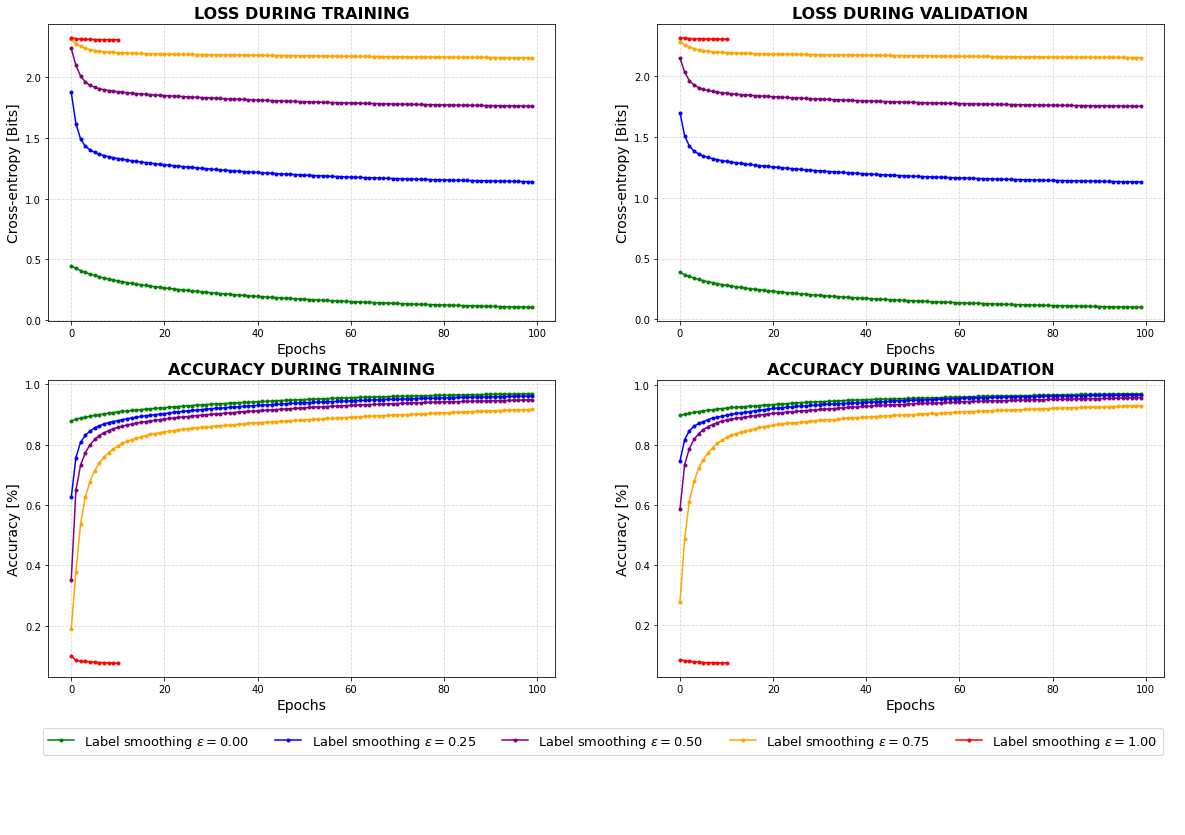

In [232]:
fn_logs = (
    f"{PATH}/results/models/history-lenet5-ls0.00.pkl",
    f"{PATH}/results/models/history-lenet5-ls0.25.pkl",
    f"{PATH}/results/models/history-lenet5-ls0.50.pkl",
    f"{PATH}/results/models/history-lenet5-ls0.75.pkl",
    f"{PATH}/results/models/history-lenet5-ls1.00.pkl",
)

colors = (
    'green',
    'blue',
    'purple',
    'orange',
    'red'
)


fig, ax = plt.subplots(2, 2, figsize=(20, 12))
lax = fig.add_axes([0.110, -0.05, 0.80, 0.2])

ax[0][0].set_title("LOSS DURING TRAINING", fontdict={'size': 16, 'weight': 'bold'})
ax[0][0].set_ylabel("Cross-entropy [Bits]", fontdict={'size': 14})
ax[0][0].set_xlabel("Epochs", fontdict={'size': 14})
ax[0][0].grid(ls='--', alpha=0.5)

ax[0][1].set_title("LOSS DURING VALIDATION", fontdict={'size': 16, 'weight': 'bold'})
ax[0][1].set_ylabel("Cross-entropy [Bits]", fontdict={'size': 14})
ax[0][1].set_xlabel("Epochs", fontdict={'size': 14})
ax[0][1].grid(ls='--', alpha=0.5)

ax[1][0].set_title("ACCURACY DURING TRAINING", fontdict={'size': 16, 'weight': 'bold'})
ax[1][0].set_ylabel("Accuracy [%]", fontdict={'size': 14})
ax[1][0].set_xlabel("Epochs", fontdict={'size': 14})
ax[1][0].grid(ls='--', alpha=0.5)

ax[1][1].set_title("ACCURACY DURING VALIDATION", fontdict={'size': 16, 'weight': 'bold'})
ax[1][1].set_ylabel("Accuracy [%]", fontdict={'size': 14})
ax[1][1].set_xlabel("Epochs", fontdict={'size': 14})
ax[1][1].grid(ls='--', alpha=0.5)

for i, fn in enumerate(fn_logs):
    with open(fn, 'rb') as handle:
        data = pickle.load(handle)
    
    ax[0][0].plot(data['loss'], ls='-', color=colors[i], marker='.')
    ax[0][1].plot(data['val_loss'], ls='-', color=colors[i], marker='.')
    
    ax[1][0].plot(data['accuracy'], ls='-', color=colors[i], marker='.')
    ax[1][1].plot(data['val_accuracy'], ls='-', color=colors[i], marker='.')
    
    lax.plot([], label=f'Label smoothing $\epsilon = {i*.25:.2f}$', ls='-', color=colors[i], marker='.')
 
lax.axis('off')
lax.legend(loc='center', ncol=5, fontsize=13)

For the skill of the model with the test dataset, some classical metrics in classification tasks, the information from the confusion matrix and the ROC curve, were used. The following snippet code prepares the view of the confusion matrix for each model trained with different label smoothing factors. The ROC curve is also generated for the average of the false positives and true positives rate. As indicated by the plots in the previous figure, it is possible to notice that the model with the regularization factor set at 1.0 is also the one with the most errors, while for the other models, the precision for all classes is >90%.

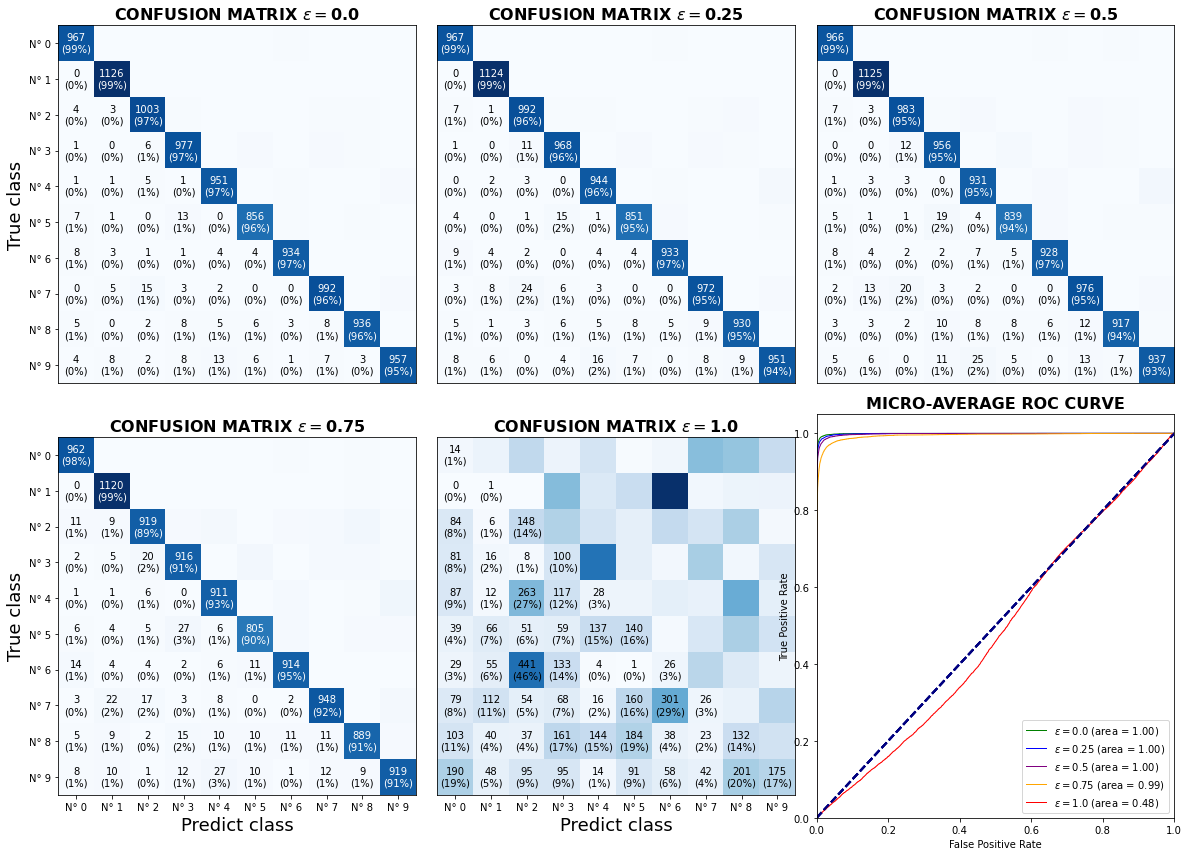

In [7]:
fn_models = (
    f"{PATH}/results/models/lenet5-ls0.00.h5",
    f"{PATH}/results/models/lenet5-ls0.25.h5",
    f"{PATH}/results/models/lenet5-ls0.50.h5",
    f"{PATH}/results/models/lenet5-ls0.75.h5",
    f"{PATH}/results/models/lenet5-ls1.00.h5",
)

colors = (
    'green',
    'blue',
    'purple',
    'orange',
    'red'
)
true = np.argmax(y_test_fmt, axis=-1)
total_samples = true.shape[0]

fig, ax = plt.subplots(2, 3, figsize=(20, 15))

for x, fn in enumerate(fn_models):
    row = x//3
    col = x%3

    cmodel = tf.keras.models.load_model(fn)
    y_pred = cmodel.predict(X_test_fmt)
    pred = np.argmax(y_pred, axis=-1)
    cm = smetrics.confusion_matrix(true, pred)

    labels = [f"N° {i}" for i in range(10)]
    total_samples = cm.sum(axis=1)[:, np.newaxis]
    normed_conf_mat = cm.astype('float')/total_samples
    matshow = ax[row][col].matshow(cm, cmap='Blues')

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if j > i: continue
            cell_text = str(cm[i, j])
            cell_text += '\n(%.0f%%)' % (normed_conf_mat[i, j] * 100)
            ax[row][col].text(
                x=j, y=i, s=cell_text, va='center', ha='center', size=10,
                color="white" if normed_conf_mat[i, j] > 0.5 else "black"
            )
    
    if row == 0:
        _ = ax[row][col].set_xticks([])
#         _ = ax[row][col].set_xticklabels(labels, fontsize=10)
    else:
        _ = ax[row][col].set_xticks(np.arange(len(labels)))
        _ = ax[row][col].set_xticklabels(labels, fontsize=10)
        _ = ax[row][col].xaxis.set_ticks_position('bottom')
        _ = ax[row][col].set_xlabel('Predict class', fontdict={'size': 18})
    
    if col == 0:
        _ = ax[row][col].set_yticks(np.arange(len(labels)))
        _ = ax[row][col].set_yticklabels(labels, fontsize=10)
        _ = ax[row][col].yaxis.set_ticks_position('left')
        _ = ax[row][col].set_ylabel('True class', fontdict={'size': 18})
    else:
        _ = ax[row][col].set_yticks([])
        
        
    _ = ax[row][col].set_title(f"CONFUSION MATRIX $\epsilon = ${0.25*x}", 
                               fontdict={'size': 16, 'weight': 'bold'})
    
    
    # ROC Curve
    fpr, tpr, roc_auc = {}, {}, {}
    
    for i, label in enumerate(labels):
        fpr[label], tpr[label], _ = smetrics.roc_curve(
            y_test_fmt[:, i], y_pred[:, i]
        )
        roc_auc[label] = smetrics.auc(
            fpr[label], tpr[label]
        )

    fpr["micro"], tpr["micro"], _ = smetrics.roc_curve(y_test_fmt.ravel(), y_pred.ravel())
    roc_auc["micro"] = smetrics.auc(fpr["micro"], tpr["micro"])


    all_fpr = np.unique(np.concatenate([fpr[label] for label in labels]))
    mean_tpr = np.zeros_like(all_fpr)
    for label in labels:
        mean_tpr += scipy.interp(all_fpr, fpr[label], tpr[label])

    mean_tpr /= len(labels)

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = smetrics.auc(fpr["macro"], tpr["macro"])

    ax[-1][-1].plot(
        fpr['micro'],
        tpr['micro'],
        color=colors[x],
        lw=1,
        label=f"$\epsilon = ${0.25*x} (area = %0.2f)" % roc_auc['micro'],
    )
    ax[-1][-1].plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    ax[-1][-1].set_xlim([0.0, 1.0])
    ax[-1][-1].set_ylim([0.0, 1.05])
    ax[-1][-1].set_xlabel("False Positive Rate")
    ax[-1][-1].set_ylabel("True Positive Rate")
    ax[-1][-1].set_title(f"MICRO-AVERAGE ROC CURVE", 
                               fontdict={'size': 16, 'weight': 'bold'})
ax[-1][-1].legend(loc="lower right")


plt.subplots_adjust(hspace=0.02, wspace=0.06)

Finally, the ROC curve of each model for each class was generated, as shown below. Again, the most noticeable variation is for the model with the maximum smoothing.

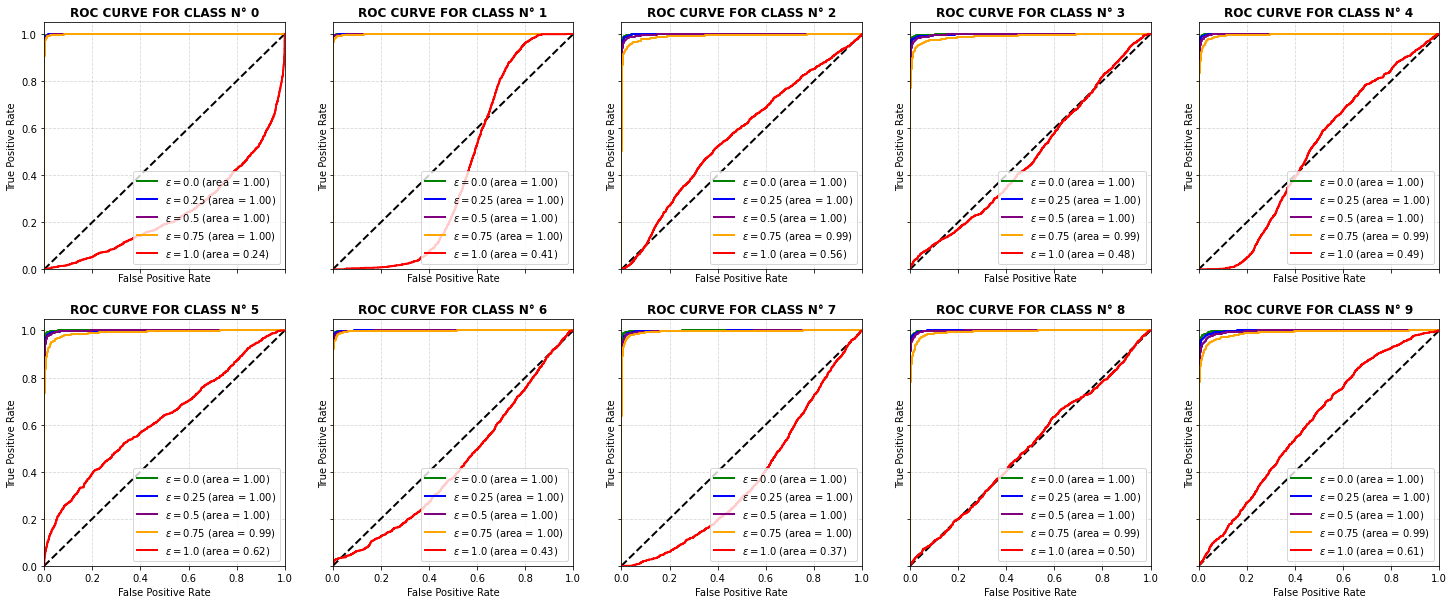

In [326]:
fig, ax = plt.subplots(2, 5, figsize=(25, 10), sharex=True, sharey=True)

for x, fn in enumerate(fn_models):    
    cmodel = tf.keras.models.load_model(fn)
    y_pred = cmodel.predict(X_test_fmt)
    pred = np.argmax(y_pred, axis=-1)
    
    for i, label in enumerate(labels):
        row = i//5
        col = i%5
        
        fpr, tpr, _ = smetrics.roc_curve(
            y_test_fmt[:, i], y_pred[:, i]
        )
        roc_auc = smetrics.auc(fpr, tpr)      
        
        ax[row][col].plot(
            fpr,
            tpr,
            color=colors[x],
            lw=lw,
            label=f"$\epsilon = ${0.25*x} (area = {roc_auc:0.2f})",
        )
        ax[row][col].legend(loc="lower right")
        ax[row][col].grid(ls='--', alpha=0.5)
        if x == 0:
            ax[row][col].plot([0, 1], [0, 1], color="k", lw=2, linestyle="--")
            ax[row][col].set_xlim([0.0, 1.0])
            ax[row][col].set_ylim([0.0, 1.05])
            ax[row][col].set_xlabel("False Positive Rate")
            ax[row][col].set_ylabel("True Positive Rate")
            ax[row][col].set_title(f"ROC CURVE FOR CLASS {label}", 
                                       fontdict={'size': 12, 'weight': 'bold'})


# plt.subplots_adjust(hspace=0.02, wspace=0.06)

## 3. Final considerations <a id="final_configurations" href="#table_of_content">^</a>
<hr />

In this work, label smoothing regularization and its fundamentals were explored. This regularization is used in neural networks in order to avoid model over-confidence in classification tasks. Some experiments were performed to assess the impact of this regularization on the MNIST dataset using the LeNet 5 CNN arquiteture. Although it is an artifact to reduce problems, misuse of label smoothing can affect the performance of classifications made by the model. It was observed that the model trained with the highest smoothing factor had the worst performance, while for the others, no very significant differences were noted, with the exception of a more accentuated convergence of the model. Thus, although it has not been done in this work, it is desirable that this regularization be configured according to other neural network hyper-parameters, such as the learning rate and optimizer parameters.

## 4. References <a id="references" href="#table_of_content">^</a>
<hr />

<ul>
    <li id="goodfellow_deep_2016">
        Goodfellow, I., Bengio, Y. and Courville, A., 2016. Deep learning. MIT press.
    </li>
    <li id="shannon_mathematical_1948">
        Shannon, C.E., 1948. A mathematical theory of communication. The Bell system technical journal, 27(3), pp.379-423.
    </li>
    <li id="murphy_machine_2012">
        Murphy, K.P., 2012. Machine learning: a probabilistic perspective. MIT press.
    </li>
    <li id="galstyan_empirical_2007">
        Galstyan, A. and Cohen, P.R., 2007, June. Empirical comparison of “hard” and “soft” label propagation for relational classification. In International Conference on Inductive Logic Programming (pp. 98-111). Springer, Berlin, Heidelberg.
    </li>
    <li id="szegedy_rethinking_2016">
        Szegedy, C., Vanhoucke, V., Ioffe, S., Shlens, J. and Wojna, Z., 2016. Rethinking the inception architecture for computer vision. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 2818-2826).
    </li>
    <li id="muller_when_2019">
        Müller, R., Kornblith, S. and Hinton, G., 2019. When does label smoothing help?. arXiv preprint arXiv:1906.02629.
    </li>
    <li id="lecun_lenet5_2015">
        LeCun, Y., 2015. LeNet-5, convolutional neural networks. URL: http://yann.lecun.com/exdb/lenet, 20(5), p.14.
    </li>
    <li id="lecun_backpropagation_1998">
            LeCun, Y., Boser, B., Denker, J.S., Henderson, D., Howard, R.E., Hubbard, W. and Jackel, L.D., 1989. Backpropagation applied to handwritten zip code recognition. Neural computation, 1(4), pp.541-551.
    </li>
</ul>